In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random 

import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs   # tasodifiy nuqtalar klasterini yaratish
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
np.random.seed(0)
centroids = [[3,3], [-3, -2], [2, -3], [0, 0]]
X, y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

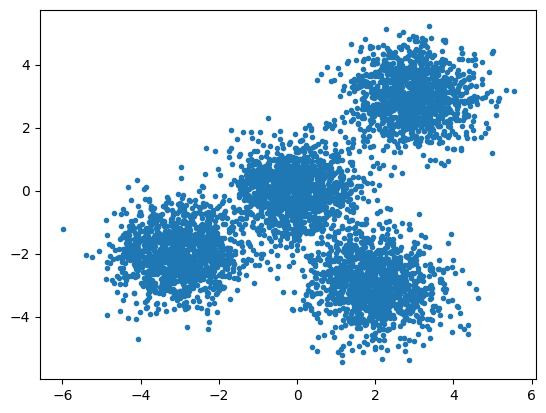

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

In [7]:
#init - sentroidlarni tanlash usuli
#n_clusters - klasterlar soni
#n_init - algoritmni necha marta ishga tushirish. Eng yaxshi sentroidlarni topish uchun

k_means = KMeans(init = "random", n_clusters = 4, n_init = 15)

In [8]:
k_means.fit(X)

KMeans(init='random', n_clusters=4, n_init=15)

**Klaster raqamini ko'rish uchun *.labels_* ga murojaat qilamiz**

In [11]:
k_means.labels_

array([1, 0, 0, ..., 3, 1, 1], dtype=int32)

In [12]:
k_means.cluster_centers_

array([[ 1.99348887e+00, -3.01067931e+00],
       [-3.01979724e+00, -1.99489798e+00],
       [-3.05006801e-02,  1.12353254e-03],
       [ 2.97795387e+00,  2.99317691e+00]])

In [13]:
print(centroids)

[[3, 3], [-3, -2], [2, -3], [0, 0]]


Algoritm yordamida topilgan centroidlarni yaxlitlab tepadagiga solishtiramiz

In [14]:
print(np.round(k_means.cluster_centers_))

[[ 2. -3.]
 [-3. -2.]
 [-0.  0.]
 [ 3.  3.]]


# **Grafik chizamiz**

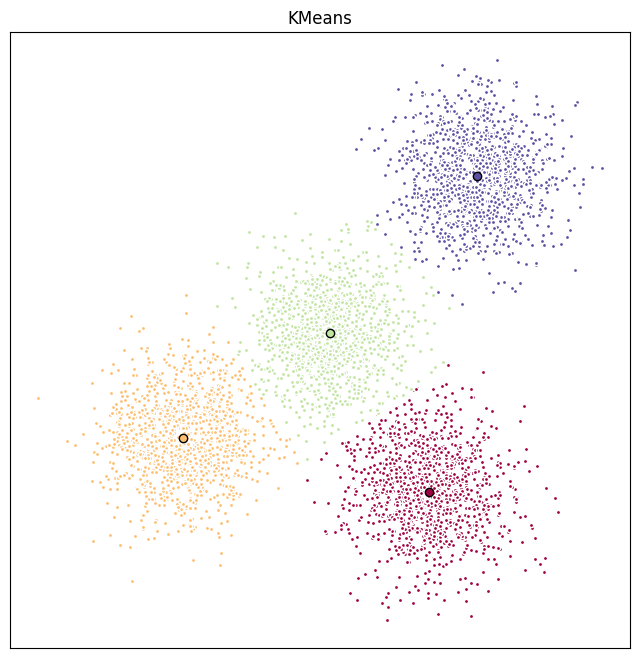

In [15]:
fig = plt.figure(figsize=(8, 8))
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# **k-means algoritmida init=k-means++ parametrining ishlatilishi**

In [23]:
k_means_2 = KMeans(n_clusters=3, init="k-means++", n_init=15)

In [24]:
k_means_2.fit(X)

KMeans(n_clusters=3, n_init=15)

In [25]:
k_means_2.labels_

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

In [26]:
k_means_2.cluster_centers_

array([[-1.84797085, -1.14985465],
       [ 2.77667484,  2.79813238],
       [ 1.89654668, -2.76936571]])

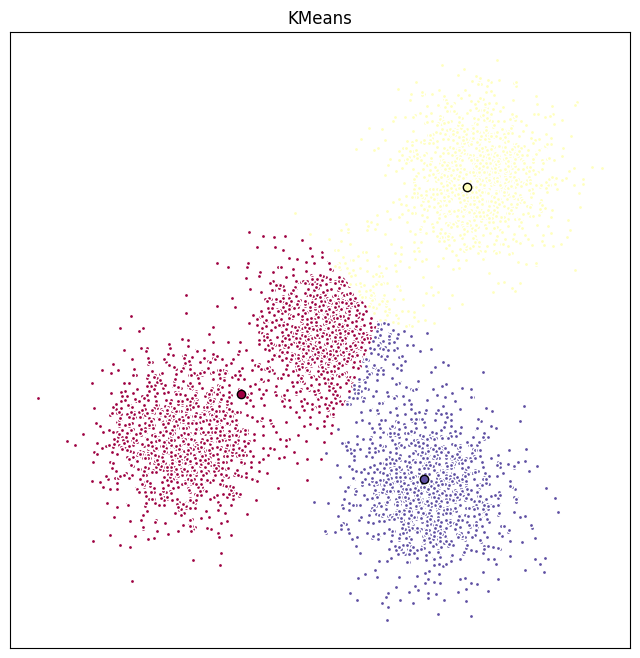

In [29]:
fig = plt.figure(figsize=(8, 8))
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_2.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means_2.cluster_centers_)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_2.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_2.cluster_centers_[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()